<a href="https://colab.research.google.com/github/TheClassicTechno/cleansea_model/blob/main/best_version/small_taco_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pathlib
import cv2
import glob




In [13]:
#processing images
bottles1 = '/content/drive/MyDrive/TEAM9SURESTART/taco/bottles'
cans1 = '/content/drive/MyDrive/TEAM9SURESTART/taco/cans'
containers1 = '/content/drive/MyDrive/TEAM9SURESTART/taco/containers'
#paper1 = '/content/drive/MyDrive/TEAM9SURESTART/taco/paper'
#plastic1 = '/content/drive/MyDrive/TEAM9SURESTART/taco/plastic'

bottles = [cv2.imread(image) for image in glob.glob(bottles1)]
cans = [cv2.imread(image) for image in glob.glob(cans1)]
containers = [cv2.imread(image) for image in glob.glob(containers1)]
#paper = [cv2.imread(image) for image in glob.glob(paper1)]
#plastic = [cv2.imread(image) for image in glob.glob(plastic1)]

train_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/TEAM9SURESTART/taco',
    validation_split = 0.1,
    subset = "training",
    seed = 24,  
    image_size = (256, 256),
    batch_size = 8
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/TEAM9SURESTART/taco',
    validation_split = 0.1,
    subset = "validation",
    seed = 24,  
    image_size = (256, 256),
    batch_size = 8
)
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(train_dataset, val_dataset, test_size = 0.1, random_state = 1, stratify = val_dataset)

from scipy.stats import zscore
import pandas as pd

# Create a sample df

# Calculate the zscores and drop zscores into new column

train_dataset = train_dataset.cache().shuffle(13).prefetch(buffer_size = tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(13).prefetch(buffer_size = tf.data.AUTOTUNE)
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.9),
])
model = Sequential ([
    #try add augmentations here
    #layers.RandomFlip("horizontal_and_vertical"),
    #layers.RandomRotation(0.2),
    
    layers.Rescaling(1./255, input_shape = (256, 256, 3)),
    #data_augmentation,
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(4, activation = 'softmax')
])
model.summary()

Found 230 files belonging to 4 classes.
Using 207 files for training.
Found 230 files belonging to 4 classes.
Using 23 files for validation.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 128, 128, 16)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4640      
                                             

In [14]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
'''
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy'],  run_eagerly=True
)
'''

model.fit (
    train_dataset, 
    validation_data = val_dataset,
    epochs = 250
)
#model.save('model.h5')

Epoch 1/250


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


26/26 [==============================] - 9s 99ms/step - loss: 1.3785 - accuracy: 0.4300 - val_loss: 1.3586 - val_accuracy: 0.5652
Epoch 2/250
26/26 [==============================] - 0s 8ms/step - loss: 1.2870 - accuracy: 0.4493 - val_loss: 1.3410 - val_accuracy: 0.5652
Epoch 3/250
26/26 [==============================] - 0s 8ms/step - loss: 1.2694 - accuracy: 0.4493 - val_loss: 1.2782 - val_accuracy: 0.5652
Epoch 4/250
26/26 [==============================] - 0s 8ms/step - loss: 1.2306 - accuracy: 0.4734 - val_loss: 1.2288 - val_accuracy: 0.5652
Epoch 5/250
26/26 [==============================] - 0s 8ms/step - loss: 1.1318 - accuracy: 0.5072 - val_loss: 1.0812 - val_accuracy: 0.5217
Epoch 6/250
26/26 [==============================] - 0s 8ms/step - loss: 0.8697 - accuracy: 0.6280 - val_loss: 0.8010 - val_accuracy: 0.7391
Epoch 7/250
26/26 [==============================] - 0s 8ms/step - loss: 0.6547 - accuracy: 0.7585 - val_loss: 0.7548 - val_accuracy: 0.8696
Epoch 8/250
26/26 [=====

Text(0.5, 1.0, 'Training-Validation Accuracy')

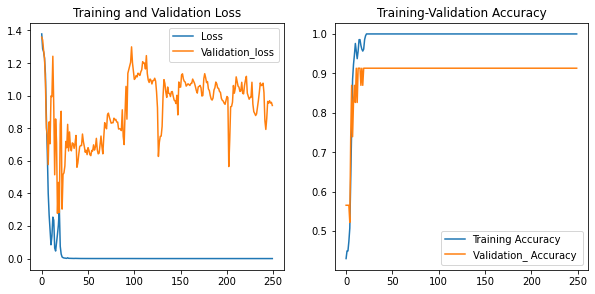

In [15]:
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")